In [93]:
import pandas as pd

# importing first dataset
df1 = pd.read_csv("Hb. Electrophoresis Data Train.csv")


In [94]:
# importing second dataset
df2 = pd.read_csv("Hb. Electrophoresis Data Test.csv")


In [95]:
#concatenating both datasets
df = pd.concat([df1, df2], ignore_index=True)
df

GENDER  RBC Count (mil/cmm)  Hemoglobin Level (g/dL)  Hematocrit (%)  \
0     Female                 3.87                     10.4            32.0   
1     Female                 4.53                      6.3            23.0   
2     Female                 4.14                      9.1            29.0   
3     Female                 4.01                     11.0            34.0   
4     Female                 3.42                      7.4            24.0   
...      ...                  ...                      ...             ...   
3410  Female                 4.09                      7.0            24.0   
3411  Female                 3.20                      8.9            28.0   
3412  Female                 3.53                      8.6            28.0   
3413  Female                 2.56                      3.7            16.0   
3414  Female                 4.31                      9.1            32.0   

      MCV (fL)  MCH (pg)  MCHC (g/dL)  RDW-CV (%)         MI  \
0           83        27           32          14  21.447028   
1           51        14           27          23  11.258278   
2           71        22           31          19  17.149758   
3           84        28           33          17  20.947631   
4           69        22           31          17  20.175439   
...        ...       ...          ...         ...        ...   
3410        58        17           29          20  14.180929   
3411        89        28           31          17  27.812500   
3412        79        24           31          18  22.379603   
3413        61        15           24          29  23.828125   
3414        74        21           28          21  17.169374   

      Hematologist Remarks  
0                        0  
1                        0  
2                        0  
3                        0  
4                        1  
...                    ...  
3410                     0  
3411                     0  
3412                     0  
3413                     0  
3414                     0  

[3415 rows x 10 columns]

In [96]:
df.isnull().sum()

GENDER                     0
RBC Count (mil/cmm)        0
Hemoglobin Level (g/dL)    0
Hematocrit (%)             0
MCV (fL)                   0
MCH (pg)                   0
MCHC (g/dL)                0
RDW-CV (%)                 0
MI                         0
Hematologist Remarks       0
dtype: int64

In [97]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [98]:
px.histogram(df, 
             x='MI', 
             title='MI vs.Hematologist Remarks', 
             color='Hematologist Remarks')

In [99]:
# drop duplicates values 

df = df.drop_duplicates()

In [100]:
df.shape

(3413, 10)

In [101]:
# outlier detection working 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3413 entries, 0 to 3414
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   GENDER                   3413 non-null   object 
 1   RBC Count (mil/cmm)      3413 non-null   float64
 2   Hemoglobin Level (g/dL)  3413 non-null   float64
 3   Hematocrit (%)           3413 non-null   float64
 4   MCV (fL)                 3413 non-null   int64  
 5   MCH (pg)                 3413 non-null   int64  
 6   MCHC (g/dL)              3413 non-null   int64  
 7   RDW-CV (%)               3413 non-null   int64  
 8   MI                       3413 non-null   float64
 9   Hematologist Remarks     3413 non-null   int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 293.3+ KB


In [102]:
df.describe()

RBC Count (mil/cmm)  Hemoglobin Level (g/dL)  Hematocrit (%)  \
count          3413.000000              3413.000000     3413.000000   
mean              4.295948                 9.135892       30.012980   
std               0.928918                 2.463947        6.523738   
min               0.590000                 1.700000        5.000000   
25%               3.740000                 7.600000       26.000000   
50%               4.280000                 9.100000       30.000000   
75%               4.850000                10.600000       34.000000   
max               8.040000                18.200000       55.000000   

          MCV (fL)     MCH (pg)  MCHC (g/dL)   RDW-CV (%)           MI  \
count  3413.000000  3413.000000  3413.000000  3413.000000  3413.000000   
mean     71.114855    21.712277    30.222385    19.268386    18.123142   
std      13.537614     5.397436     2.748239     4.868679    10.076508   
min      41.000000    11.000000    21.000000    12.000000     6.697819   
25%      61.000000    18.000000    29.000000    16.000000    13.012048   
50%      69.000000    21.000000    31.000000    18.000000    16.586538   
75%      81.000000    26.000000    32.000000    21.000000    20.608899   
max     134.000000    43.000000    50.000000    56.000000   227.118644   

       Hematologist Remarks  
count           3413.000000  
mean               0.173454  
std                0.378695  
min                0.000000  
25%                0.000000  
50%                0.000000  
75%                0.000000  
max                1.000000

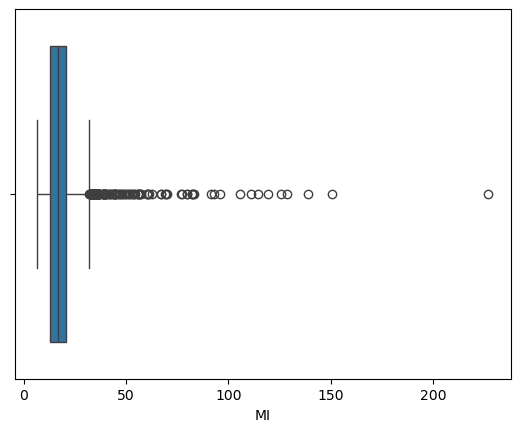

In [103]:
sns.boxplot(x= "MI",data=df)
plt.show()

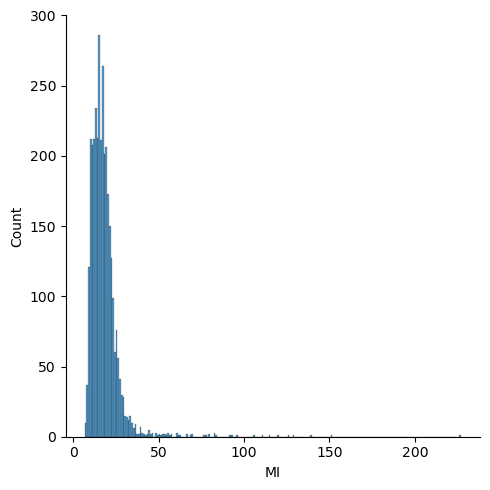

In [104]:
sns.displot(df["MI"])
plt.show()

In [105]:
q1 = df["MI"].quantile(0.25)
q3 = df["MI"].quantile(0.75)


In [106]:
IQR = q3-q1

In [107]:
min_range = q1 - (1.5*IQR) 
max_range = q3 + (1.5*IQR)
min_range,max_range

(np.float64(1.616771524999999), np.float64(32.004175965))

In [108]:
nds = df[df["MI"]<=max_range] 

In [109]:
nds.shape

(3286, 10)

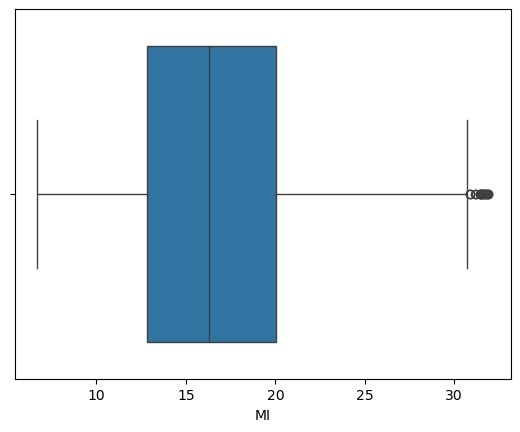

In [110]:
sns.boxplot(x= "MI",data=nds)
plt.show()

In [111]:
nds.describe()

RBC Count (mil/cmm)  Hemoglobin Level (g/dL)  Hematocrit (%)  \
count           3286.00000              3286.000000     3286.000000   
mean               4.38066                 9.244644       30.391753   
std                0.82812                 2.396512        6.172831   
min                1.84000                 2.000000        9.000000   
25%                3.81000                 7.800000       27.000000   
50%                4.32000                 9.200000       30.000000   
75%                4.87000                10.600000       34.000000   
max                8.04000                18.200000       55.000000   

          MCV (fL)     MCH (pg)  MCHC (g/dL)   RDW-CV (%)           MI  \
count  3286.000000  3286.000000  3286.000000  3286.000000  3286.000000   
mean     70.175898    21.398965    30.188375    19.054474    16.795078   
std      12.505029     5.106833     2.723057     4.457315     5.045727   
min      41.000000    11.000000    21.000000    12.000000     6.697819   
25%      61.000000    18.000000    29.000000    16.000000    12.850260   
50%      69.000000    21.000000    31.000000    18.000000    16.290628   
75%      80.000000    25.000000    32.000000    21.000000    20.054945   
max     111.000000    39.000000    50.000000    52.000000    31.901840   

       Hematologist Remarks  
count           3286.000000  
mean               0.175593  
std                0.380532  
min                0.000000  
25%                0.000000  
50%                0.000000  
75%                0.000000  
max                1.000000

In [112]:
# Convert 'GENDER' into numeric column (0 for Female, 1 for Male )
df_encoded = pd.get_dummies(nds, columns=["GENDER"], drop_first=True)

#rename the column into gender 
if 'GENDER_Male' in df_encoded.columns:
    df_encoded = df_encoded.rename(columns={'GENDER_Male': 'GENDER'})

In [113]:
df_encoded['GENDER'] = df_encoded['GENDER'].astype(int)

In [114]:
df_encoded.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3286 entries, 0 to 3414
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   RBC Count (mil/cmm)      3286 non-null   float64
 1   Hemoglobin Level (g/dL)  3286 non-null   float64
 2   Hematocrit (%)           3286 non-null   float64
 3   MCV (fL)                 3286 non-null   int64  
 4   MCH (pg)                 3286 non-null   int64  
 5   MCHC (g/dL)              3286 non-null   int64  
 6   RDW-CV (%)               3286 non-null   int64  
 7   MI                       3286 non-null   float64
 8   Hematologist Remarks     3286 non-null   int64  
 9   GENDER                   3286 non-null   int64  
dtypes: float64(4), int64(6)
memory usage: 282.4 KB


In [115]:
df_encoded.head()

RBC Count (mil/cmm)  Hemoglobin Level (g/dL)  Hematocrit (%)  MCV (fL)  \
0                 3.87                     10.4            32.0        83   
1                 4.53                      6.3            23.0        51   
2                 4.14                      9.1            29.0        71   
3                 4.01                     11.0            34.0        84   
4                 3.42                      7.4            24.0        69   

   MCH (pg)  MCHC (g/dL)  RDW-CV (%)         MI  Hematologist Remarks  GENDER  
0        27           32          14  21.447028                     0       0  
1        14           27          23  11.258278                     0       0  
2        22           31          19  17.149758                     0       0  
3        28           33          17  20.947631                     0       0  
4        22           31          17  20.175439                     1       0

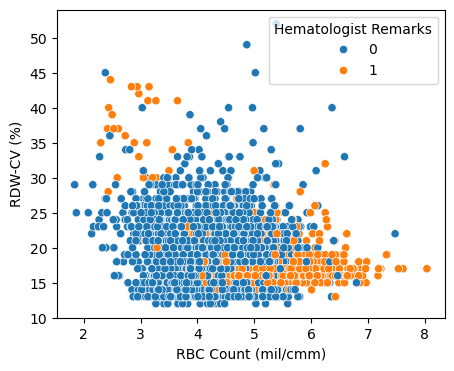

In [116]:
plt.figure(figsize=(5,4))
sns.scatterplot(x="RBC Count (mil/cmm)",y="RDW-CV (%)",data=df_encoded,hue="Hematologist Remarks")
plt.show()

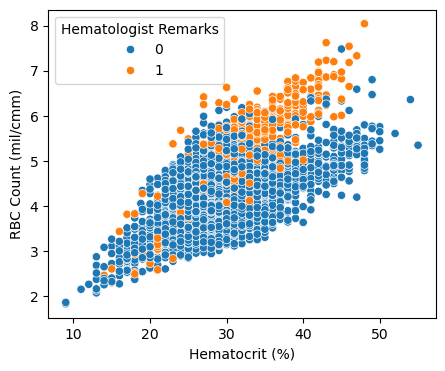

In [117]:
plt.figure(figsize=(5,4))
sns.scatterplot(x="Hematocrit (%)",y="RBC Count (mil/cmm)",data=df_encoded,hue="Hematologist Remarks")
plt.show()

In [118]:
x = df_encoded.drop("Hematologist Remarks", axis=1)
y = df_encoded["Hematologist Remarks"]


In [119]:
df_encoded["Hematologist Remarks"].value_counts()

Hematologist Remarks
0    2709
1     577
Name: count, dtype: int64

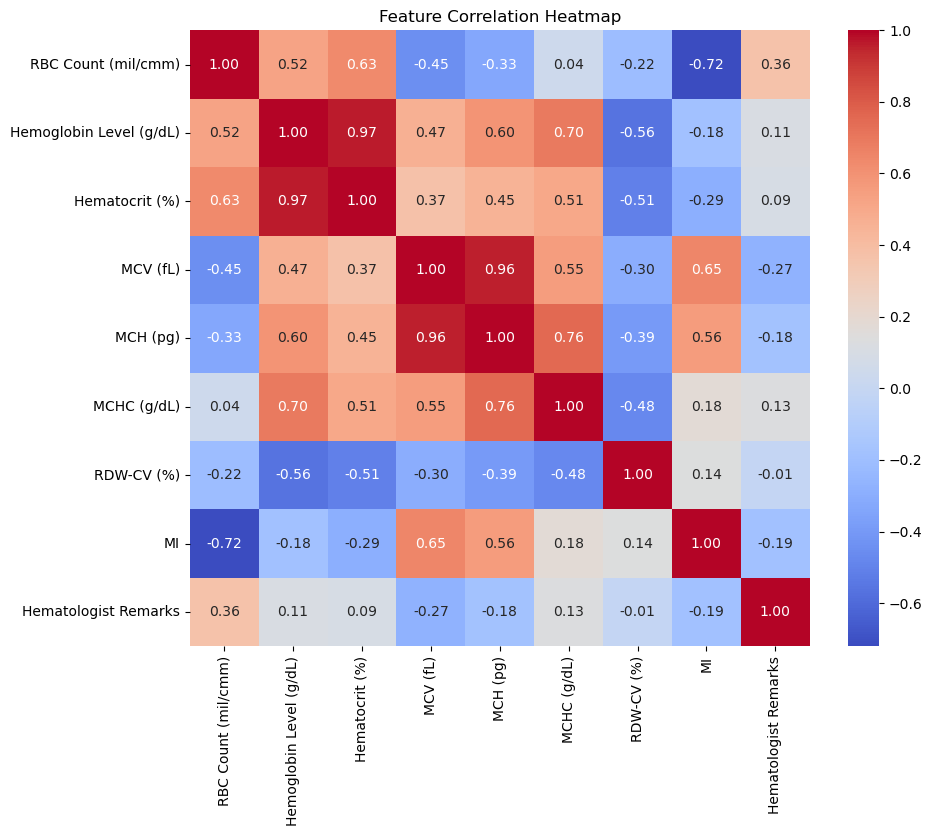

In [120]:
# correlation heatmap
plt.figure(figsize=(10, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

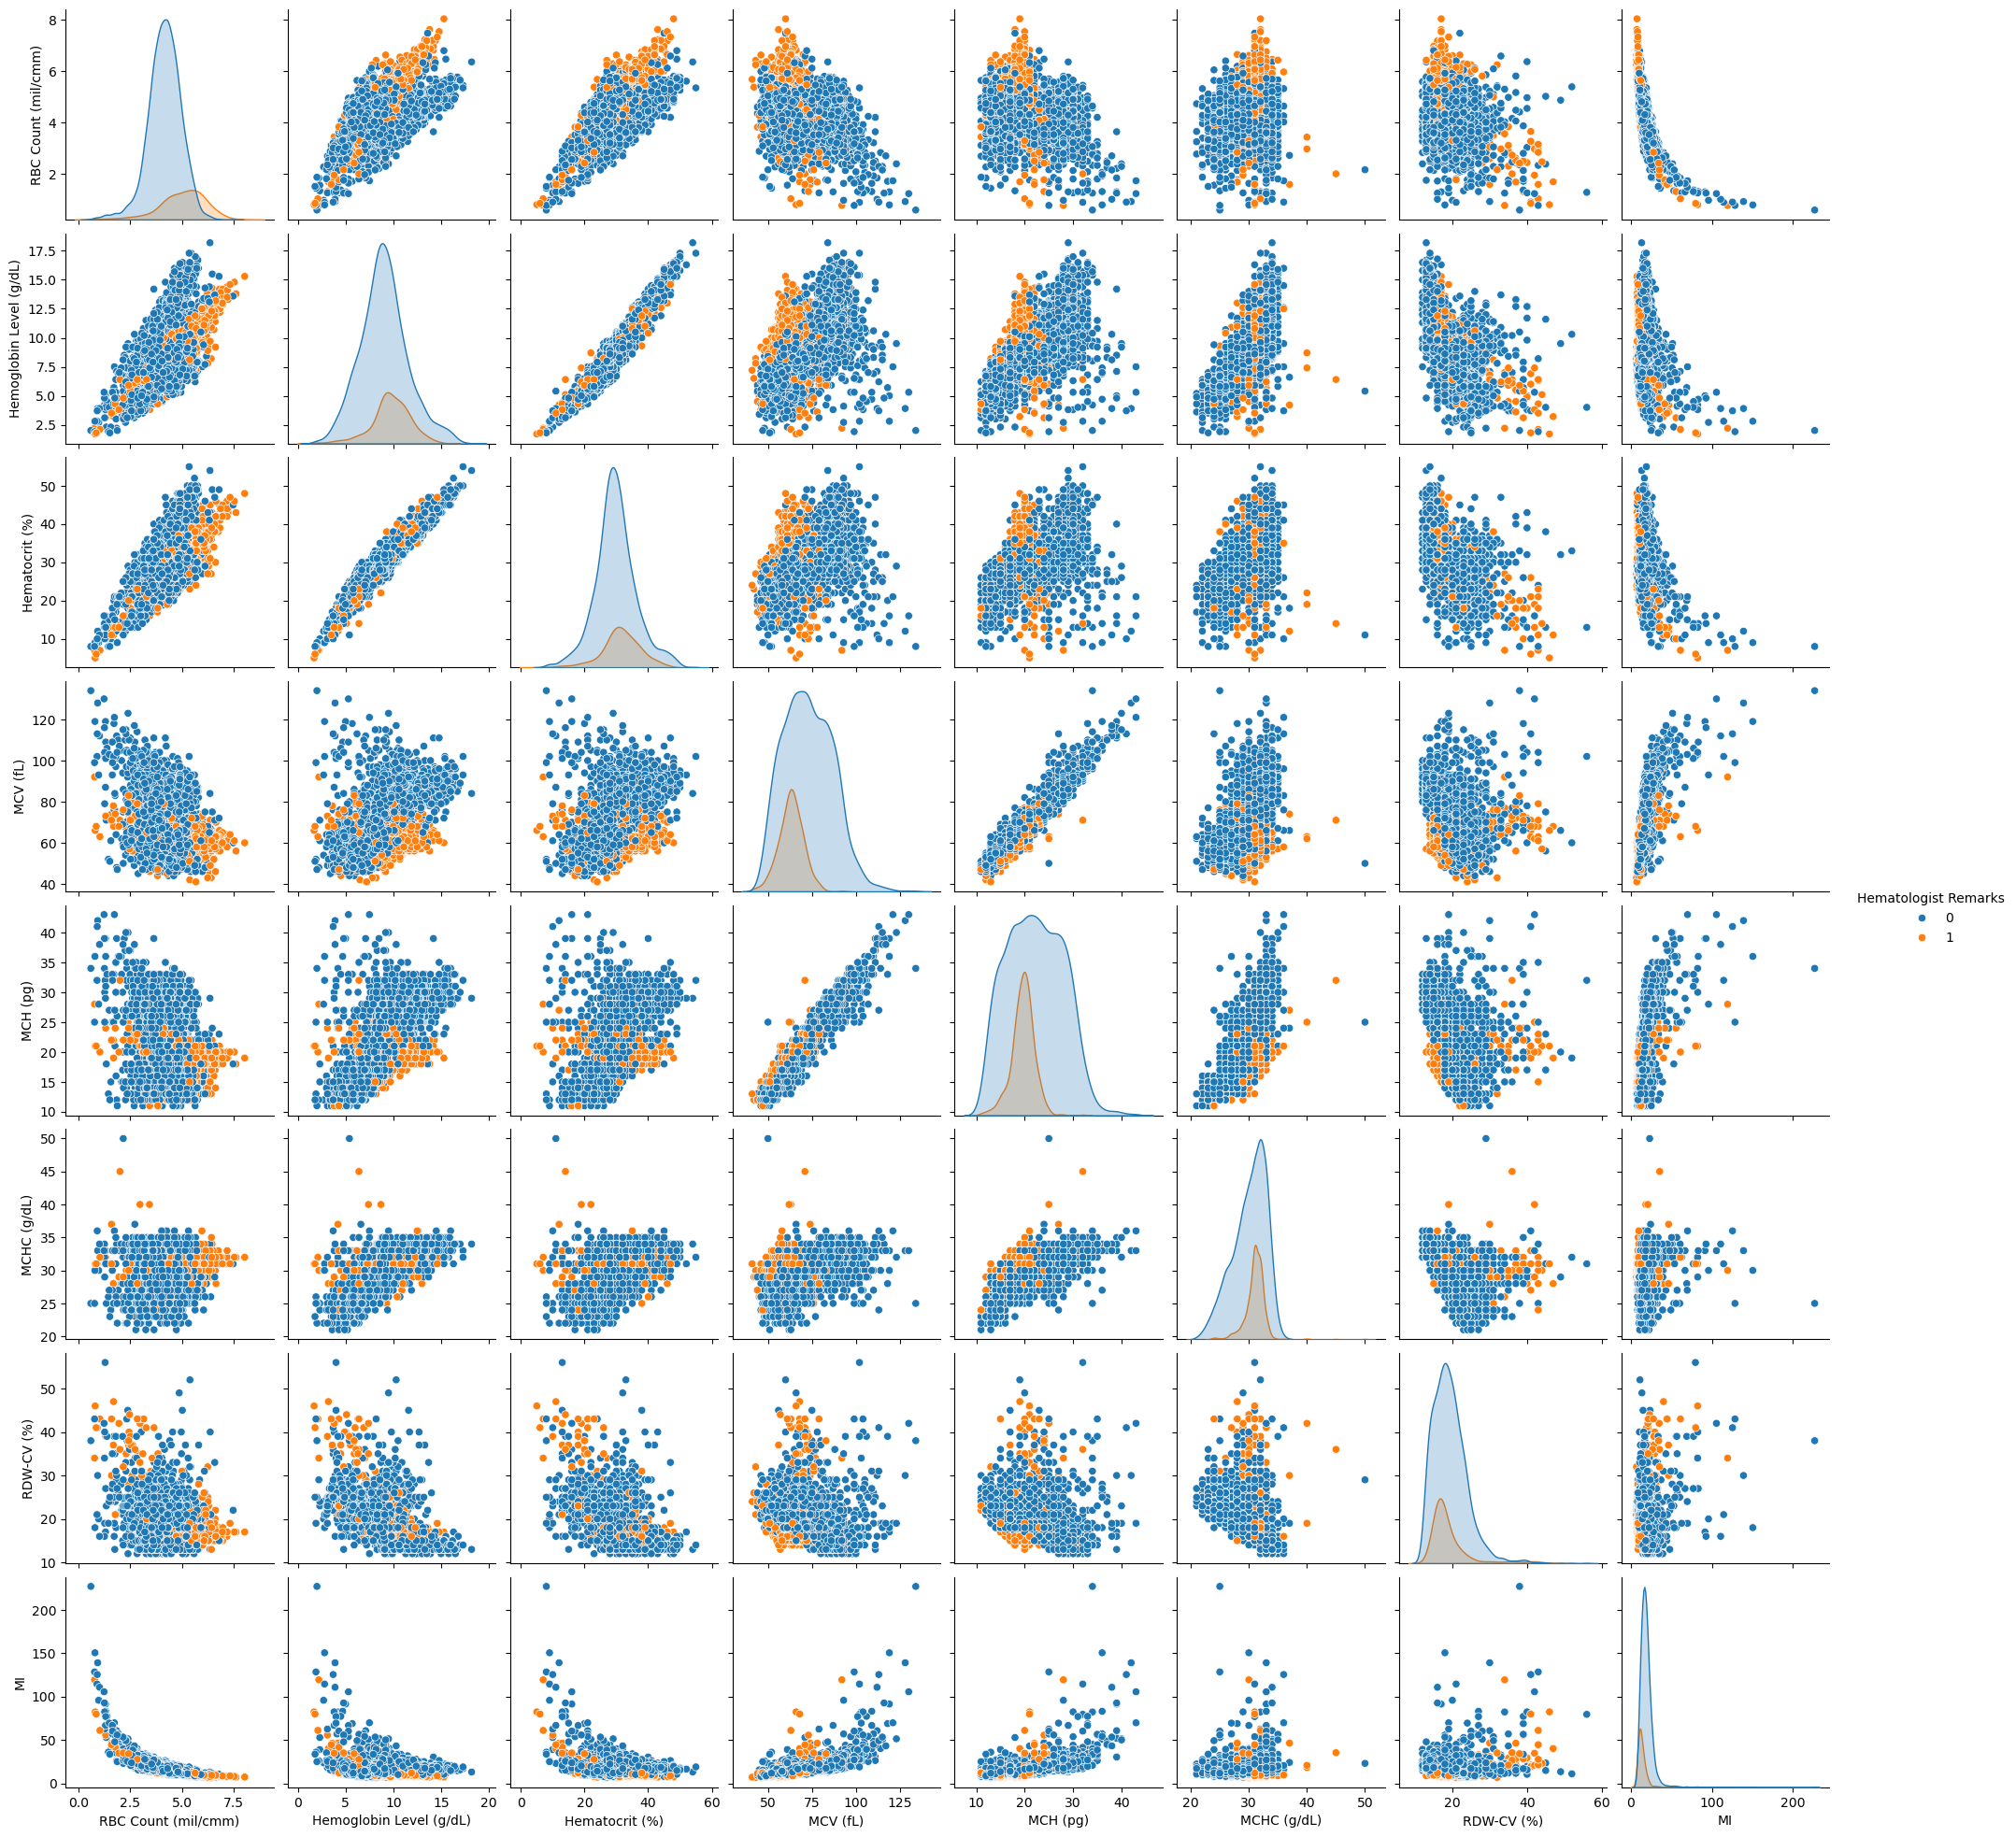

In [121]:
# pairplot
sns.pairplot(df, hue='Hematologist Remarks', diag_kind='kde')
plt.show()

In [122]:
# here it is imbalanced dataset so we will do sampling


In [123]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [124]:
ru = RandomUnderSampler()
ru_x , ru_y = ru.fit_resample(x,y)

In [125]:
ru_y.value_counts()

Hematologist Remarks
0    577
1    577
Name: count, dtype: int64

In [126]:
from sklearn.model_selection import train_test_split

In [127]:
x_train, x_test, y_train, y_test = train_test_split(ru_x,ru_y, test_size=0.2,random_state=42)

In [128]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit only on training data
x_train_scaled = scaler.fit_transform(x_train)

# Transform test set
x_test_scaled = scaler.transform(x_test)


In [129]:
from sklearn.linear_model import LogisticRegression 

In [130]:
model = LogisticRegression(max_iter=1000 ,class_weight='balanced', random_state=42)
model.fit(x_train_scaled,y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [131]:
model.score(x_train_scaled,y_train)*100, model.score(x_test_scaled,y_test)*100

(79.73997833152762, 83.54978354978356)

In [132]:
model.predict([[5.3	,8.8,28	,53	,17	,31	,16	,10	,1
]])


array([1])

In [133]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

In [134]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

y_test_pred = model.predict(x_test_scaled)
y_test_proba = model.predict_proba(x_test_scaled)[:, 1]  # for AUROC


print("Model Performance on Test Data:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Recall:", recall_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("F1 Score:", f1_score(y_test, y_test_pred))
print("AUROC:", roc_auc_score(y_test, y_test_proba))


Model Performance on Test Data:
Accuracy: 0.8354978354978355
Recall: 0.8256880733944955
Precision: 0.8256880733944955
F1 Score: 0.8256880733944955
AUROC: 0.8946458114002106


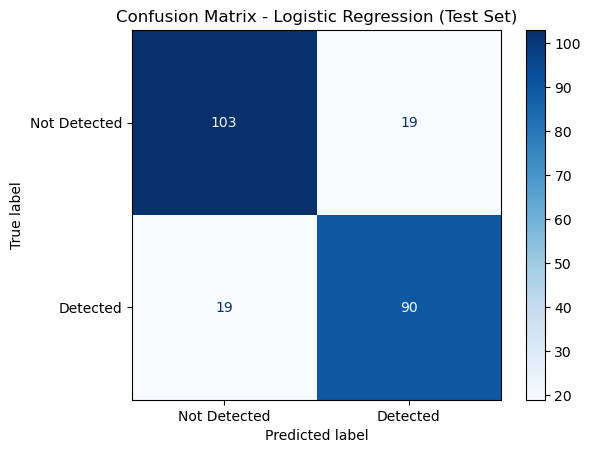

In [135]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Detected", "Detected"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression (Test Set)")
plt.grid(False)
plt.show()


In [136]:
#now implementing decison trees 
from sklearn.tree import DecisionTreeClassifier

In [137]:
dt = DecisionTreeClassifier(criterion="gini",splitter="best",max_depth=4)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [138]:
dt.score(x_train,y_train)*100, dt.score(x_test,y_test)*100

(85.26543878656555, 83.11688311688312)

In [139]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [140]:
model= {"criterion":["gini", "entropy", "log_loss" ],
     "splitter":["best","random"],
      "max_depth":[i for i in range(2,20)],}

In [141]:
gd = GridSearchCV(DecisionTreeClassifier(),param_grid=model)
gd.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19],
                         'splitter': ['best', 'random']})

In [142]:
gd.best_params_

{'criterion': 'gini', 'max_depth': 8, 'splitter': 'random'}

In [143]:
gd.best_score_

np.float64(0.8320564042303173)

In [144]:
from sklearn.tree import plot_tree

In [145]:
plt.figure(figsize=(100,100))
plot_tree(dt)
plt.savefig("demo.jpg")
plt.show()

In [146]:
# Predict
y_test_dt = dt.predict(x_test)
y_test_dt_proba = dt.predict_proba(x_test)[:, 1]

# Metrics
from sklearn.metrics import classification_report, roc_auc_score

print(" Decison Trees:")
print(classification_report(y_test, y_test_dt))
print("AUROC Score:", roc_auc_score(y_test, y_test_dt_proba))


 Decison Trees:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       122
           1       0.82      0.82      0.82       109

    accuracy                           0.83       231
   macro avg       0.83      0.83      0.83       231
weighted avg       0.83      0.83      0.83       231

AUROC Score: 0.9064896976989021


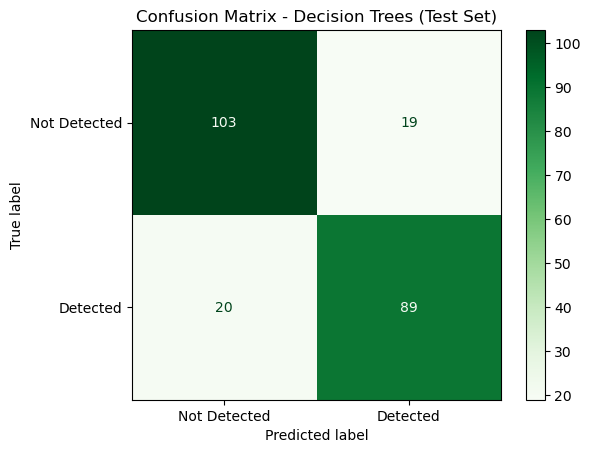

In [147]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_test_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=["Not Detected", "Detected"])
disp.plot(cmap="Greens")
plt.title("Confusion Matrix - Decision Trees (Test Set)")
plt.grid(False)
plt.show()


In [148]:
# now implementing random forest 
from sklearn.ensemble import RandomForestClassifier

# Create and train the model
rf_model = RandomForestClassifier(n_estimators=30,n_jobs=1, random_state=42)
rf_model.fit(x_train, y_train)  # Note: No need to scale for tree models



RandomForestClassifier(n_estimators=30, n_jobs=1, random_state=42)

In [149]:
%%time
rf_model.fit(x_train,y_train)

CPU times: total: 31.2 ms
Wall time: 39.7 ms


RandomForestClassifier(n_estimators=30, n_jobs=1, random_state=42)

In [150]:
rf_model.score(x_train,y_train)*100, rf_model.score(x_test,y_test)*100

(99.56663055254604, 83.98268398268398)

In [151]:
# Predict
y_test_rf = rf_model.predict(x_test)
y_test_rf_proba = rf_model.predict_proba(x_test)[:, 1]

# Metrics
from sklearn.metrics import classification_report, roc_auc_score

print(" Random Forest Performance:")
print(classification_report(y_test, y_test_rf))
print("AUROC Score:", roc_auc_score(y_test, y_test_rf_proba))


 Random Forest Performance:
              precision    recall  f1-score   support

           0       0.88      0.80      0.84       122
           1       0.80      0.88      0.84       109

    accuracy                           0.84       231
   macro avg       0.84      0.84      0.84       231
weighted avg       0.84      0.84      0.84       231

AUROC Score: 0.9193487742517672


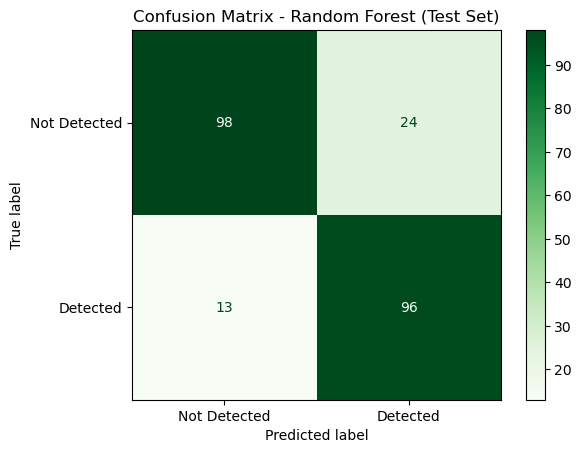

In [152]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_test_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=["Not Detected", "Detected"])
disp.plot(cmap="Greens")
plt.title("Confusion Matrix - Random Forest (Test Set)")
plt.grid(False)
plt.show()


C:\Users\MR-LAPTOP\AppData\Local\Temp\ipykernel_5124\1282007228.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




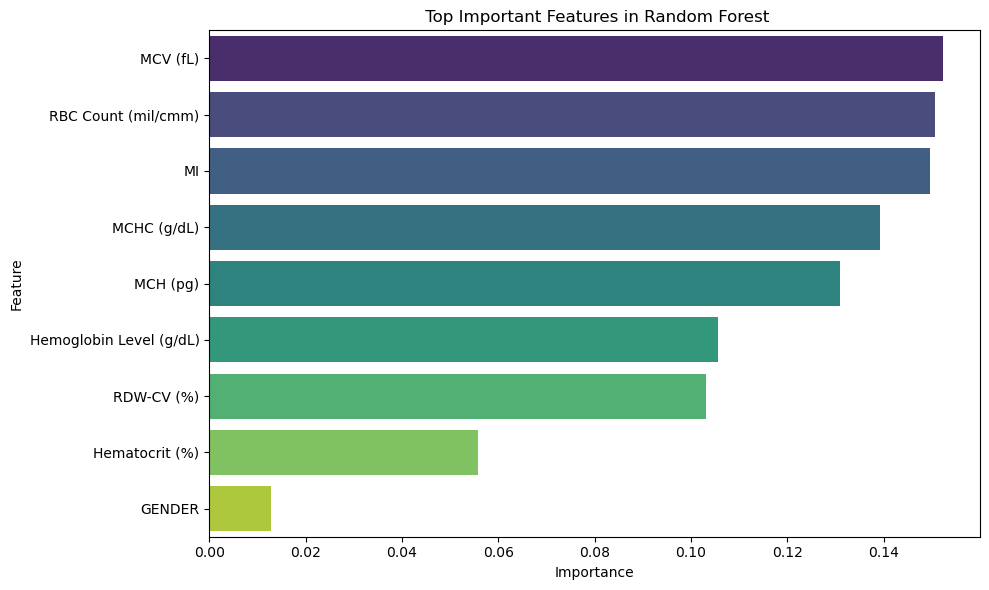

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = rf_model.feature_importances_
features = x_train.columns

# Create dataframe for better visualization
importance_df = pd.DataFrame({"Feature": features, "Importance": importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x="Importance", y="Feature", palette="viridis")
plt.title(" Top Important Features in Random Forest")
plt.tight_layout()
plt.show()



In [154]:
# now implementing K-NN

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=14, algorithm="auto", weights= "uniform",n_jobs=1)
knn.fit(x_train, y_train)



KNeighborsClassifier(n_jobs=1, n_neighbors=14)

In [155]:
knn.score(x_train,y_train)*100, knn.score(x_test,y_test)*100

(85.15709642470206, 84.84848484848484)

In [156]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [157]:
model= {"weights" : ['uniform', 'distance'],
     "algorithm" : ['auto', 'ball_tree', 'kd_tree', 'brute'],
        "n_neighbors":[1,100],
        "n_jobs" :[1,100]
       }

In [158]:
gd = GridSearchCV(KNeighborsClassifier(),param_grid=model)
gd.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_jobs': [1, 100], 'n_neighbors': [1, 100],
                         'weights': ['uniform', 'distance']})

In [159]:
gd.best_params_

{'algorithm': 'auto', 'n_jobs': 1, 'n_neighbors': 100, 'weights': 'distance'}

In [160]:
gd.best_score_

np.float64(0.8147356051703877)

In [161]:
# Predict
y_test_knn = knn.predict(x_test)
y_test_knn_proba = knn.predict_proba(x_test)[:, 1]

# Metrics
from sklearn.metrics import classification_report, roc_auc_score

print(" KNN Performance:")
print(classification_report(y_test, y_test_knn))
print("AUROC Score:", roc_auc_score(y_test, y_test_knn_proba))


 KNN Performance:
              precision    recall  f1-score   support

           0       0.87      0.84      0.85       122
           1       0.82      0.86      0.84       109

    accuracy                           0.85       231
   macro avg       0.85      0.85      0.85       231
weighted avg       0.85      0.85      0.85       231

AUROC Score: 0.9261543089186344


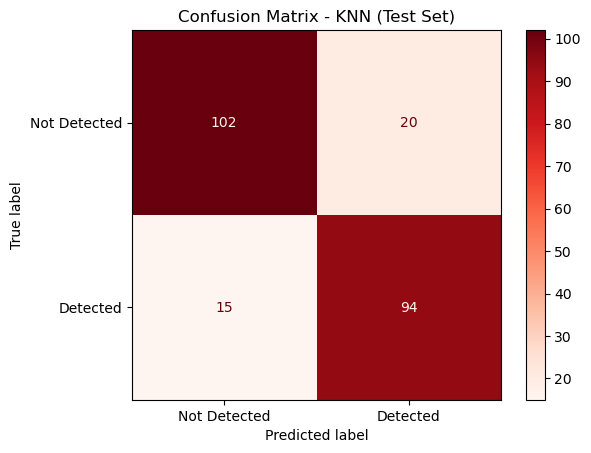

In [162]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_test_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=["Not Detected", "Detected"])
disp.plot(cmap="Reds")
plt.title("Confusion Matrix - KNN (Test Set)")
plt.grid(False)
plt.show()

In [163]:
x_train, x_test, y_train, y_test = train_test_split(ru_x,ru_y, test_size=0.2,random_state=42)

In [164]:
# now implementing SVM;
from sklearn.svm import SVC

svm = SVC(kernel="poly",probability=True,)
svm.fit(x_train, y_train)



SVC(kernel='poly', probability=True)

In [165]:
svm.score(x_train,y_train)*100, svm.score(x_test,y_test)*100

(80.28169014084507, 82.68398268398268)

In [166]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [167]:
model= {
       'kernel': ['linear', 'rbf', 'poly'],
}        


In [168]:
# Predict
y_test_svm = svm.predict(x_test)
y_test_svm_proba = svm.predict_proba(x_test)[:, 1]

# Metrics
from sklearn.metrics import classification_report, roc_auc_score

print(" SVM Performance:")
print(classification_report(y_test, y_test_svm))
print("AUROC Score:", roc_auc_score(y_test, y_test_svm_proba))

 SVM Performance:
              precision    recall  f1-score   support

           0       0.87      0.79      0.83       122
           1       0.79      0.87      0.83       109

    accuracy                           0.83       231
   macro avg       0.83      0.83      0.83       231
weighted avg       0.83      0.83      0.83       231

AUROC Score: 0.9008873514814257


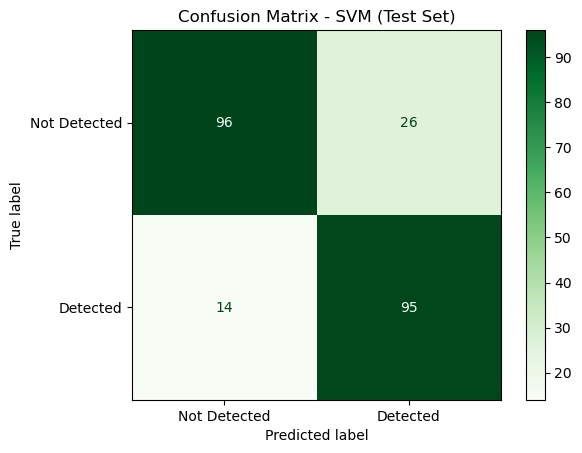

In [169]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_test_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=["Not Detected", "Detected"])
disp.plot(cmap="Greens")
plt.title("Confusion Matrix - SVM (Test Set)")
plt.grid(False)
plt.show()


In [170]:
# implementing ensemble 

In [171]:
# max voting 


In [172]:
from sklearn.ensemble import VotingClassifier


In [173]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

lg = [
    ("model", LogisticRegression()),
    ("dt1", DecisionTreeClassifier()),
    ("svm", SVC()),
    ("rf_model", RandomForestClassifier()),
    ("knn", KNeighborsClassifier())
]


In [174]:
vc=VotingClassifier(lg, weights=[1000,1500,2000,2500,3000])
vc.fit(x_train_scaled,y_train)

VotingClassifier(estimators=[('model', LogisticRegression()),
                             ('dt1', DecisionTreeClassifier()), ('svm', SVC()),
                             ('rf_model', RandomForestClassifier()),
                             ('knn', KNeighborsClassifier())],
                 weights=[1000, 1500, 2000, 2500, 3000])

In [175]:
vc.score(x_train_scaled,y_train)*100,vc.score(x_test_scaled,y_test)*100,  

(91.98266522210184, 85.71428571428571)

In [176]:
from sklearn.metrics import  accuracy_score, precision_score, recall_score, f1_score

# Make predictions
y_pred = vc.predict(x_test_scaled)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc * 100)

# Precision
prec = precision_score(y_test, y_pred, average='weighted')  # or 'macro'/'micro' depending on use case
print("Precision:", prec * 100)

# Recall
rec = recall_score(y_test, y_pred, average='weighted')
print("Recall:", rec * 100)

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1 * 100)


Accuracy: 85.71428571428571
Precision: 85.89419575926323
Recall: 85.71428571428571
F1 Score: 85.72553747237292


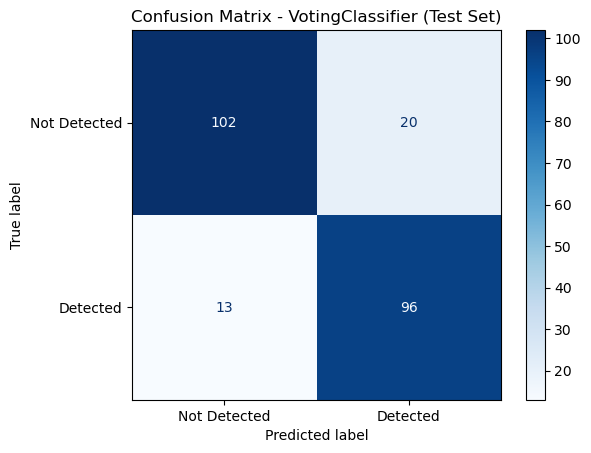

In [177]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Make predictions using the VotingClassifier
y_pred_vc = vc.predict(x_test_scaled)

# Compute confusion matrix
cm_vc = confusion_matrix(y_test, y_pred_vc)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_vc, display_labels=["Not Detected", "Detected"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - VotingClassifier (Test Set)")
plt.grid(False)
plt.show()


In [178]:
# now implementing ensemble Bagging Classifier 

In [179]:
from sklearn.ensemble import BaggingClassifier 
from sklearn.ensemble import RandomForestClassifier

In [180]:
bg = BaggingClassifier(estimator=SVC(),n_estimators=100)
bg.fit(x_train_scaled,y_train)

BaggingClassifier(estimator=SVC(), n_estimators=100)

In [181]:
bg.score(x_train_scaled,y_train)*100,bg.score(x_test_scaled,y_test)*100

(86.45720476706393, 84.4155844155844)

In [182]:
# Predict
y_test_bg = bg.predict(x_test_scaled)
y_test_bg_proba = bg.predict_proba(x_test_scaled)[:, 1]


In [183]:
from sklearn.metrics import classification_report, roc_auc_score

print(" Bagging Classifier Performance:")
print(classification_report(y_test, y_test_bg))
print("AUROC Score:", roc_auc_score(y_test, y_test_bg_proba))


 Bagging Classifier Performance:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       122
           1       0.82      0.86      0.84       109

    accuracy                           0.84       231
   macro avg       0.84      0.85      0.84       231
weighted avg       0.85      0.84      0.84       231

AUROC Score: 0.9216799518724621


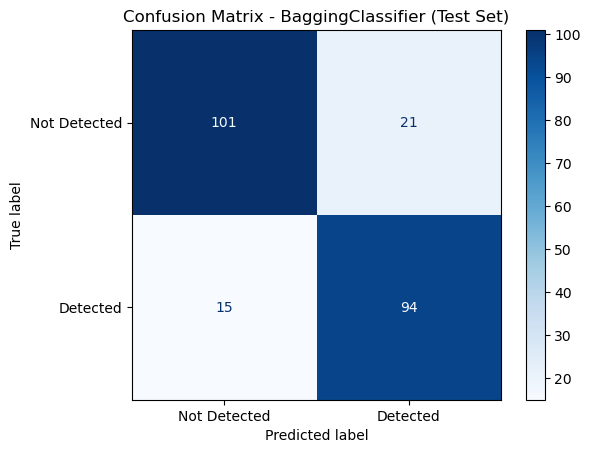

In [184]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix
cm_bg = confusion_matrix(y_test, y_test_bg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_bg, display_labels=["Not Detected", "Detected"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - BaggingClassifier (Test Set)")
plt.grid(False)
plt.show()
